<a href="https://colab.research.google.com/github/juanepstein99/DI_Bootcamp/blob/main/Week8/Day3%264/DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daily Challenge: Complete Exploratory Data Analysis.

Instructions


* Download and import the Data Science Job Salary dataset here.
* Identify and differentiate between quantitative and qualitative data within the dataset.
* Preprocess the data by handling missing values and removing duplicates if needed.
* Perform a group-wise analysis of the experience_level column, calculating the mean and median salaries for each group using Pandas'.groupby.
* Utilize Pandas' integration with Matplotlib to create a bar chart visualizing the average salaries for each experience level. Ensure the chart includes appropriate labels, a title, and a color scheme that enhances readability.


Dataset shape:
(607, 12)

Columns:
Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

First 5 rows:
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000        

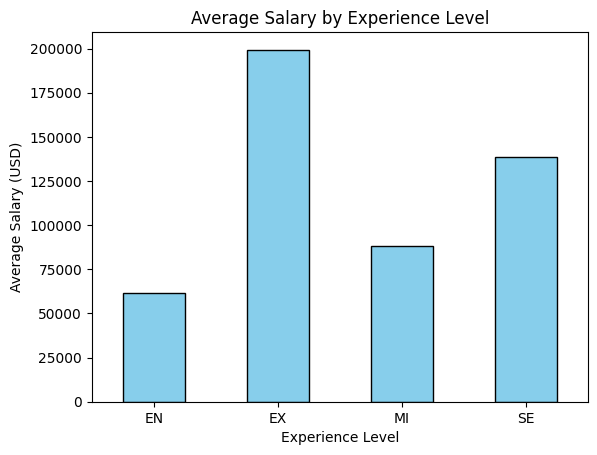

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ds_salaries.csv")

# Display basic info about dataset
print("Dataset shape:")
print(df.shape)

print("\nColumns:")
print(df.columns)

print("\nFirst 5 rows:")
print(df.head())

# Identify quantitative and qualitative data

# Quantitative columns (numeric)
quantitative_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Qualitative columns (categorical/text)
qualitative_columns = df.select_dtypes(include=["object"]).columns

print("\nQuantitative columns:")
print(list(quantitative_columns))

print("\nQualitative columns:")
print(list(qualitative_columns))

# Handle missing values

print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Remove rows with missing salary values
df = df.dropna(subset=["salary_in_usd"])

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Remove duplicate rows

rows_before = df.shape[0]

df = df.drop_duplicates()

rows_after = df.shape[0]

print("\nDuplicates removed:", rows_before - rows_after)

# Group-wise analysis by experience level

salary_stats = df.groupby("experience_level")["salary_in_usd"].agg(["mean", "median"])

print("\nMean and Median salary by experience level:")
print(salary_stats)

# Create bar chart of average salary by experience level

salary_stats["mean"].plot(
    kind="bar",
    color="skyblue",
    edgecolor="black"
)

plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=0)

plt.show()
